In [1]:
# Show plots as part of the notebook
%matplotlib inline

# Show images inline
from IPython.display import Image

# Standard library packages
import io
import os
import re

# Import Biopython modules to interact with KEGG
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

import KEGGutils as kg
import networkx as nx

# Import Pandas, so we can use dataframes
import pandas as pd

In [2]:
def PDF(filename):
    # display a pdf file in an iframe
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

def to_df(result):
    # convert a csv formatted string into a pd dataframe
    return pd.read_csv(io.StringIO(result), header=None)

# Data Retrieval Section

The following section is the code to retrieve the information for the ecoli metabolic pathways.
Don't run this code everytime so you don't have to use REST calls to KEGG everytime, rather it is saved in the csv's and so can be read in by pandas

In [3]:
# this results in error
# print(REST.kegg_get("eco_M00001").read())

HTTPError: HTTP Error 400: Bad Request

In [4]:
# retrive KEGG data
result = REST.kegg_info('eco').read()
print(result)

T00007           Escherichia coli K-12 MG1655 KEGG Genes Database
eco              Release 111.0+/08-01, Aug 24
                 Kanehisa Laboratories
                 4,609 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot



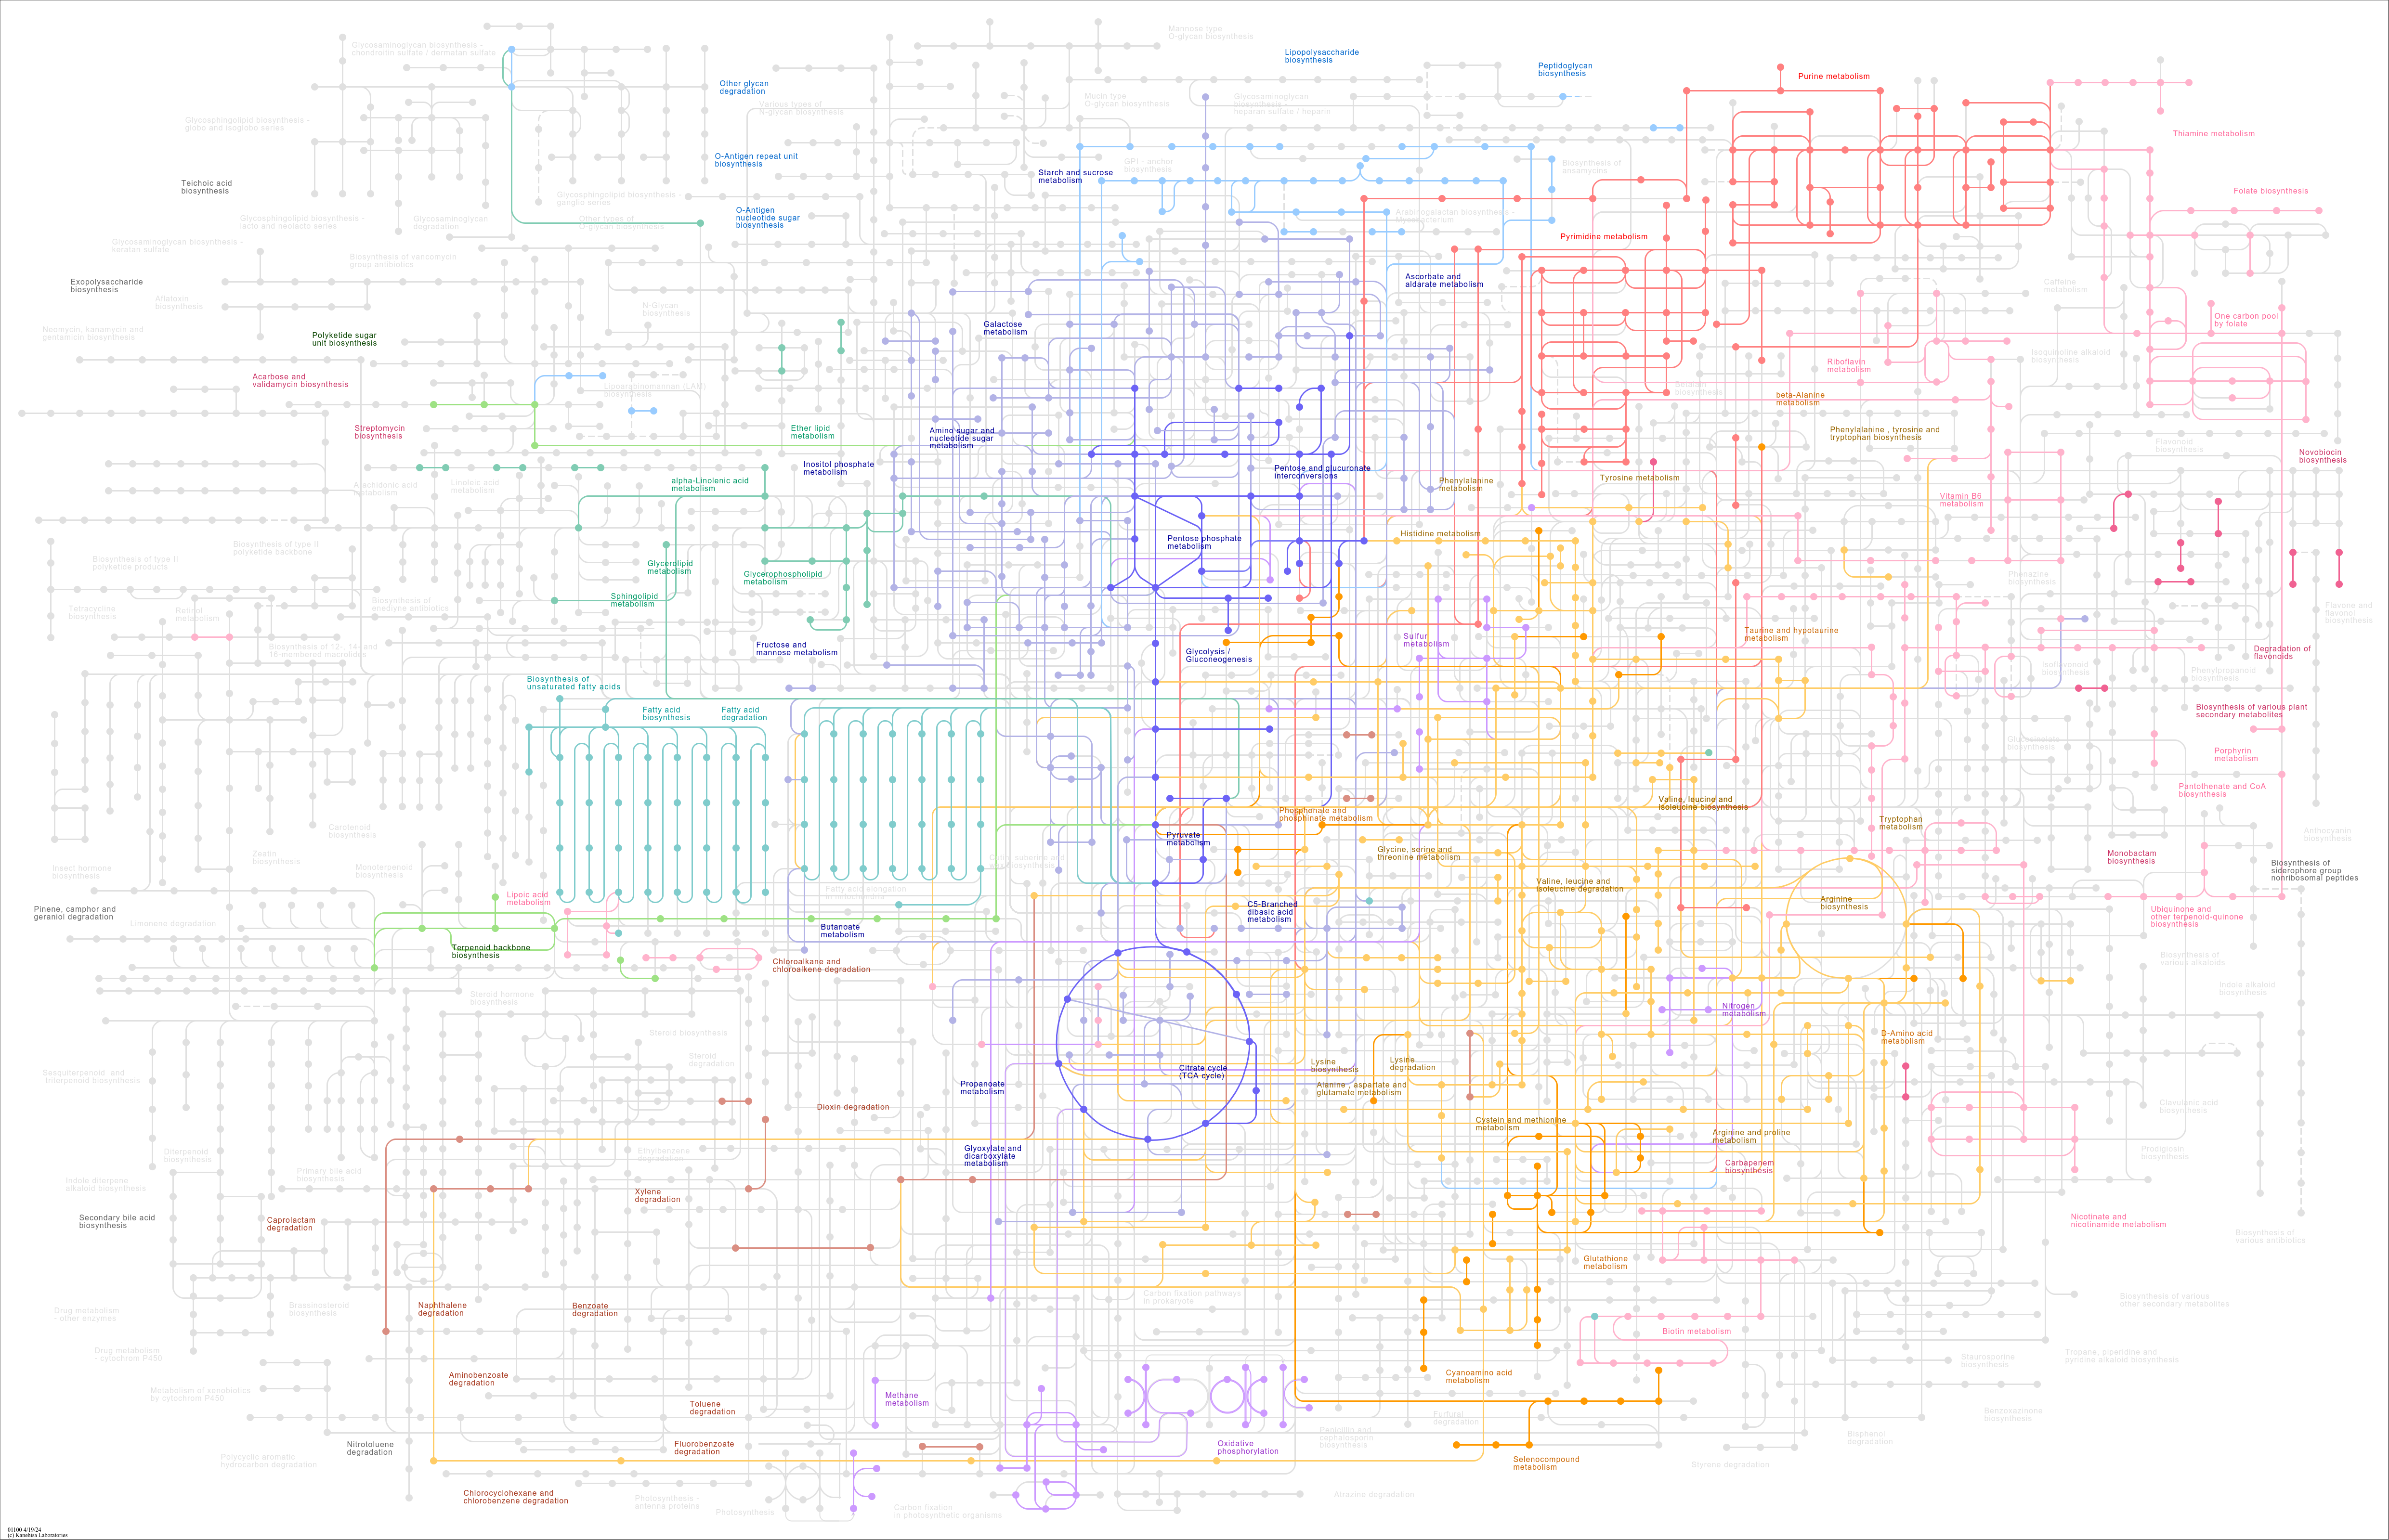

In [9]:
# visual of the ecoli metabolic pathways
# result = REST.kegg_get('eco01100', 'image').read()
# Image(result)

In [11]:
eco_metpath = REST.kegg_get('eco01100').read()
print(eco_metpath)

ENTRY       eco01100                    Pathway
NAME        Metabolic pathways - Escherichia coli K-12 MG1655
PATHWAY_MAP eco01100  Metabolic pathways
MODULE      eco_M00001  Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate [PATH:eco01100]
            eco_M00002  Glycolysis, core module involving three-carbon compounds [PATH:eco01100]
            eco_M00003  Gluconeogenesis, oxaloacetate => fructose-6P [PATH:eco01100]
            eco_M00004  Pentose phosphate pathway (Pentose phosphate cycle) [PATH:eco01100]
            eco_M00005  PRPP biosynthesis, ribose 5P => PRPP [PATH:eco01100]
            eco_M00006  Pentose phosphate pathway, oxidative phase, glucose 6P => ribulose 5P [PATH:eco01100]
            eco_M00007  Pentose phosphate pathway, non-oxidative phase, fructose 6P => ribose 5P [PATH:eco01100]
            eco_M00008  Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate [PATH:eco01100]
            eco_M00009  Citrate cycle (TCA cycle, Krebs cycle) [PATH

In [20]:
# extract rel pathway section
rel_pathway_section = re.search(r'REL_PATHWAY(.*?)(KO_PATHWAY|///)', eco_metpath, re.DOTALL).group(1)


# find all pairs from this section and convert to list of tuples
pairs = re.findall(r'eco\d+\s+[^\n]+', rel_pathway_section)
rel_pathways = [(pair.split()[0], ' '.join(pair.split()[1:])) for pair in pairs]
rel_pathways

[('eco00010', 'Glycolysis / Gluconeogenesis'),
 ('eco00020', 'Citrate cycle (TCA cycle)'),
 ('eco00030', 'Pentose phosphate pathway'),
 ('eco00040', 'Pentose and glucuronate interconversions'),
 ('eco00051', 'Fructose and mannose metabolism'),
 ('eco00052', 'Galactose metabolism'),
 ('eco00053', 'Ascorbate and aldarate metabolism'),
 ('eco00061', 'Fatty acid biosynthesis'),
 ('eco00071', 'Fatty acid degradation'),
 ('eco00121', 'Secondary bile acid biosynthesis'),
 ('eco00130', 'Ubiquinone and other terpenoid-quinone biosynthesis'),
 ('eco00190', 'Oxidative phosphorylation'),
 ('eco00220', 'Arginine biosynthesis'),
 ('eco00230', 'Purine metabolism'),
 ('eco00240', 'Pyrimidine metabolism'),
 ('eco00250', 'Alanine, aspartate and glutamate metabolism'),
 ('eco00260', 'Glycine, serine and threonine metabolism'),
 ('eco00261', 'Monobactam biosynthesis'),
 ('eco00270', 'Cysteine and methionine metabolism'),
 ('eco00280', 'Valine, leucine and isoleucine degradation'),
 ('eco00290', 'Valine, l

In [185]:
for id, name in rel_pathways:
    print(id, '-->', name)

eco00010 --> Glycolysis / Gluconeogenesis
eco00020 --> Citrate cycle (TCA cycle)
eco00030 --> Pentose phosphate pathway
eco00040 --> Pentose and glucuronate interconversions
eco00051 --> Fructose and mannose metabolism
eco00052 --> Galactose metabolism
eco00053 --> Ascorbate and aldarate metabolism
eco00061 --> Fatty acid biosynthesis
eco00071 --> Fatty acid degradation
eco00121 --> Secondary bile acid biosynthesis
eco00130 --> Ubiquinone and other terpenoid-quinone biosynthesis
eco00190 --> Oxidative phosphorylation
eco00220 --> Arginine biosynthesis
eco00230 --> Purine metabolism
eco00240 --> Pyrimidine metabolism
eco00250 --> Alanine, aspartate and glutamate metabolism
eco00260 --> Glycine, serine and threonine metabolism
eco00261 --> Monobactam biosynthesis
eco00270 --> Cysteine and methionine metabolism
eco00280 --> Valine, leucine and isoleucine degradation
eco00290 --> Valine, leucine and isoleucine biosynthesis
eco00300 --> Lysine biosynthesis
eco00310 --> Lysine degradation
ec

In [35]:
testpath = REST.kegg_get('eco01053').read()
print(testpath)

ENTRY       eco01053                    Pathway
NAME        Biosynthesis of siderophore group nonribosomal peptides - Escherichia coli K-12 MG1655
CLASS       Metabolism; Metabolism of terpenoids and polyketides
PATHWAY_MAP eco01053  Biosynthesis of siderophore group nonribosomal peptides
ORGANISM    Escherichia coli K-12 MG1655 [GN:eco]
GENE        b2265  menF; isochorismate synthase MenF [KO:K02552] [EC:5.4.4.2]
            b0593  entC; isochorismate synthase EntC [KO:K02361] [EC:5.4.4.2]
            b0595  entB; enterobactin synthase component B [KO:K01252] [EC:3.3.2.1 6.3.2.14]
            b0596  entA; 2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase [KO:K00216] [EC:1.3.1.28]
            b0583  entD; phosphopantetheinyl transferase EntD [KO:K02362] [EC:6.3.2.14 2.7.8.-]
            b0594  entE; 2,3-dihydroxybenzoate-AMP ligase [KO:K02363] [EC:6.3.2.14 6.2.1.71]
            b0586  entF; apo-serine activating enzyme [KO:K02364] [EC:6.3.2.14 6.2.1.72]
            b0597  entH; proofread

In [8]:

def parse_pathway(pathway):
    sections = re.split(r'(ENTRY|NAME|CLASS|PATHWAY_MAP|MODULE|ORGANISM|GENE|COMPOUND|REFERENCE)', pathway)
    parsed_data = {
        'ENTRY': '',
        'NAME': '',
        'CLASS': '',
        'PATHWAY_MAP': '',
        'ORGANISM': '',
        'GENE': [],
        'COMPOUND': []
    }

    for section in sections:
        if section in parsed_data.keys():
            parsed_data[section] = sections[sections.index(section) + 1].strip()

    parsed_data["ENTRY"] = parsed_data["ENTRY"].split()[0]
    parsed_data["GENE"] = parse_genes(parsed_data["GENE"])
    parsed_data["COMPOUND"] = parse_compounds(parsed_data["COMPOUND"])

    return parsed_data

In [184]:
test = parse_pathway(testpath)

for i in test:
    print(i,'\n',test[i])

ENTRY 
 eco01053
NAME 
 Biosynthesis of siderophore group nonribosomal peptides - Escherichia coli K-12 MG1655
CLASS 
 Metabolism; Metabolism of terpenoids and polyketides
PATHWAY_MAP 
 eco01053  Biosynthesis of siderophore group nonribosomal peptides
ORGANISM 
 Escherichia coli K-12 MG1655 [GN:eco]
GENE 
 [('b2265', 'menF', 'isochorismate synthase MenF', 'K02552', '5.4.4.2'), ('b0593', 'entC', 'isochorismate synthase EntC', 'K02361', '5.4.4.2'), ('b0595', 'entB', 'enterobactin synthase component B', 'K01252', '3.3.2.1 6.3.2.14'), ('b0596', 'entA', '2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase', 'K00216', '1.3.1.28'), ('b0583', 'entD', 'phosphopantetheinyl transferase EntD', 'K02362', '6.3.2.14 2.7.8.-'), ('b0594', 'entE', '2,3-dihydroxybenzoate-AMP ligase', 'K02363', '6.3.2.14 6.2.1.71'), ('b0586', 'entF', 'apo-serine activating enzyme', 'K02364', '6.3.2.14 6.2.1.72'), ('b0597', 'entH', 'proofreading thioesterase in enterobactin biosynthesis', 'K24147', '')]
COMPOUND 
 [('C00158', 

split pathway into sections

In [51]:
sections = re.split(r'(ENTRY|NAME|CLASS|PATHWAY_MAP|MODULE|ORGANISM|GENE|COMPOUND|REFERENCE)', testpath)
for i in sections:
    print(i.strip())
    print()
    print("new section")



new section
ENTRY

new section
eco01053                    Pathway

new section
NAME

new section
Biosynthesis of siderophore group nonribosomal peptides - Escherichia coli K-12 MG1655

new section
CLASS

new section
Metabolism; Metabolism of terpenoids and polyketides

new section
PATHWAY_MAP

new section
eco01053  Biosynthesis of siderophore group nonribosomal peptides

new section
ORGANISM

new section
Escherichia coli K-12 MG1655 [GN:eco]

new section
GENE

new section
b2265  menF; isochorismate synthase MenF [KO:K02552] [EC:5.4.4.2]
            b0593  entC; isochorismate synthase EntC [KO:K02361] [EC:5.4.4.2]
            b0595  entB; enterobactin synthase component B [KO:K01252] [EC:3.3.2.1 6.3.2.14]
            b0596  entA; 2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase [KO:K00216] [EC:1.3.1.28]
            b0583  entD; phosphopantetheinyl transferase EntD [KO:K02362] [EC:6.3.2.14 2.7.8.-]
            b0594  entE; 2,3-dihydroxybenzoate-AMP ligase [KO:K02363] [EC:6.3.2.14 6.2.1

In [56]:
parsed_data = {
    'ENTRY': '',
    'NAME': '',
    'CLASS': '',
    'PATHWAY_MAP': '',
    'ORGANISM': '',
    'GENE': [],
    'COMPOUND': []
}

for section in sections:
    if section in parsed_data.keys():
        parsed_data[section] = sections[sections.index(section) + 1].strip()

In [57]:
for i in parsed_data.keys():
    print(i, "\n", parsed_data[i])

ENTRY 
 eco01053                    Pathway
NAME 
 Biosynthesis of siderophore group nonribosomal peptides - Escherichia coli K-12 MG1655
CLASS 
 Metabolism; Metabolism of terpenoids and polyketides
PATHWAY_MAP 
 eco01053  Biosynthesis of siderophore group nonribosomal peptides
ORGANISM 
 Escherichia coli K-12 MG1655 [GN:eco]
GENE 
 b2265  menF; isochorismate synthase MenF [KO:K02552] [EC:5.4.4.2]
            b0593  entC; isochorismate synthase EntC [KO:K02361] [EC:5.4.4.2]
            b0595  entB; enterobactin synthase component B [KO:K01252] [EC:3.3.2.1 6.3.2.14]
            b0596  entA; 2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase [KO:K00216] [EC:1.3.1.28]
            b0583  entD; phosphopantetheinyl transferase EntD [KO:K02362] [EC:6.3.2.14 2.7.8.-]
            b0594  entE; 2,3-dihydroxybenzoate-AMP ligase [KO:K02363] [EC:6.3.2.14 6.2.1.71]
            b0586  entF; apo-serine activating enzyme [KO:K02364] [EC:6.3.2.14 6.2.1.72]
            b0597  entH; proofreading thioesterase 

split genes into list of tuples with gene info

In [119]:
genes = parsed_data["GENE"]

for i in parse_genes(genes):
    print(i)

('b2265', 'menF', 'isochorismate synthase MenF', 'K02552', '5.4.4.2')
('b0593', 'entC', 'isochorismate synthase EntC', 'K02361', '5.4.4.2')
('b0595', 'entB', 'enterobactin synthase component B', 'K01252', '3.3.2.1 6.3.2.14')
('b0596', 'entA', '2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase', 'K00216', '1.3.1.28')
('b0583', 'entD', 'phosphopantetheinyl transferase EntD', 'K02362', '6.3.2.14 2.7.8.-')
('b0594', 'entE', '2,3-dihydroxybenzoate-AMP ligase', 'K02363', '6.3.2.14 6.2.1.71')
('b0586', 'entF', 'apo-serine activating enzyme', 'K02364', '6.3.2.14 6.2.1.72')
('b0597', 'entH', 'proofreading thioesterase in enterobactin biosynthesis', 'K24147', '')


In [7]:
# convert to df and add column headers (geneID, geneName, geneDescription, KO#, EC#)
def parse_genes(genelist):
    gene_tuples = []
    sections = re.split(r'(\b\d{4}$)|\n', genelist)
    pattern = re.compile(r'(\S+)\s+(\S+); (.+?) \[KO:(K\d+)\](?: \[EC:([^\]]+)\])?')
    for i in sections:
        if i:
            match = pattern.findall(i.strip())
            for m in match:
                gene_tuples.append(m)

    return gene_tuples
    # return pd.DataFrame(gene_tuples, columns=['geneID', 'geneName', 'Description', 'KO#', 'EC#'])

parse compounds into list of tuples

In [142]:
compounds = parsed_data["COMPOUND"]

entries = [entry.strip() for entry in compounds.split('\n')]
entries

['C00158  Citrate',
 'C00196  2,3-Dihydroxybenzoate',
 'C00230  3,4-Dihydroxybenzoate',
 'C00251  Chorismate',
 'C00315  Spermidine',
 'C00805  Salicylate',
 'C00885  Isochorismate',
 'C02637  3-Dehydroshikimate',
 'C04171  (2S,3S)-2,3-Dihydro-2,3-dihydroxybenzoate',
 'C05821  Enterochelin',
 'C06769  Vibriobactin',
 'C12037  Pyochelin',
 'C12038  Yersiniabactin',
 'C12216  Mycobactin S',
 'C12219  Corynebactin',
 'C12220  Myxochelin A',
 'C12221  Myxochelin B',
 'C20883  3,4-Dihydroxybenzoyl-[aryl-carrier protein]',
 'C20884  (3,4-Dihydroxybenzoyl)adenylate',
 'C20885  N-Citryl-spermidine',
 'C20952  N1-(3,4-Dihydroxybenzoyl)-N8-citryl spermidine',
 "C22004  N8,N'8-Citryl-bis(spermidine)",
 "C22069  N1-(3,4-Dihydroxybenzoyl)-N8,N'8-citryl-bis(spermidine)",
 'C22273  Petrobactin']

In [143]:
compound_tuples = []
pattern = re.compile(r'(C\d{5})\s+(\S+)')
for entry in entries:
    # finds matches to pattern and sets as entries in a tuple
    match = pattern.findall(entry)
    for m in match:
        print(match)
        compound_tuples.append(m)




[('C00158', 'Citrate')]
[('C00196', '2,3-Dihydroxybenzoate')]
[('C00230', '3,4-Dihydroxybenzoate')]
[('C00251', 'Chorismate')]
[('C00315', 'Spermidine')]
[('C00805', 'Salicylate')]
[('C00885', 'Isochorismate')]
[('C02637', '3-Dehydroshikimate')]
[('C04171', '(2S,3S)-2,3-Dihydro-2,3-dihydroxybenzoate')]
[('C05821', 'Enterochelin')]
[('C06769', 'Vibriobactin')]
[('C12037', 'Pyochelin')]
[('C12038', 'Yersiniabactin')]
[('C12216', 'Mycobactin')]
[('C12219', 'Corynebactin')]
[('C12220', 'Myxochelin')]
[('C12221', 'Myxochelin')]
[('C20883', '3,4-Dihydroxybenzoyl-[aryl-carrier')]
[('C20884', '(3,4-Dihydroxybenzoyl)adenylate')]
[('C20885', 'N-Citryl-spermidine')]
[('C20952', 'N1-(3,4-Dihydroxybenzoyl)-N8-citryl')]
[('C22004', "N8,N'8-Citryl-bis(spermidine)")]
[('C22069', "N1-(3,4-Dihydroxybenzoyl)-N8,N'8-citryl-bis(spermidine)")]
[('C22273', 'Petrobactin')]


In [6]:
def parse_compounds(compoundlist):
    if len(compoundlist) < 1:
        return [] 

    entries = [entry.strip() for entry in compoundlist.split('\n')]
    pattern = re.compile(r'(C\d{5})\s+(\S+)')
    compound_tuples = []
    for entry in entries:
        match = pattern.findall(entry)
        for m in match:
            # print(match)
            compound_tuples.append(m)

    return(compound_tuples)
    # return pd.DataFrame(compound_tuples, columns=['CompoundID', 'Name'])

In [152]:
for i in parse_compounds(compounds):
    print(i)

('C00158', 'Citrate')
('C00196', '2,3-Dihydroxybenzoate')
('C00230', '3,4-Dihydroxybenzoate')
('C00251', 'Chorismate')
('C00315', 'Spermidine')
('C00805', 'Salicylate')
('C00885', 'Isochorismate')
('C02637', '3-Dehydroshikimate')
('C04171', '(2S,3S)-2,3-Dihydro-2,3-dihydroxybenzoate')
('C05821', 'Enterochelin')
('C06769', 'Vibriobactin')
('C12037', 'Pyochelin')
('C12038', 'Yersiniabactin')
('C12216', 'Mycobactin')
('C12219', 'Corynebactin')
('C12220', 'Myxochelin')
('C12221', 'Myxochelin')
('C20883', '3,4-Dihydroxybenzoyl-[aryl-carrier')
('C20884', '(3,4-Dihydroxybenzoyl)adenylate')
('C20885', 'N-Citryl-spermidine')
('C20952', 'N1-(3,4-Dihydroxybenzoyl)-N8-citryl')
('C22004', "N8,N'8-Citryl-bis(spermidine)")
('C22069', "N1-(3,4-Dihydroxybenzoyl)-N8,N'8-citryl-bis(spermidine)")
('C22273', 'Petrobactin')


# Section to parse data into list of dictionaries

In [187]:
metpathways = [(name, REST.kegg_get(ecoID).read()) for ecoID, name in rel_pathways]
metpathways

# testpath = REST.kegg_get('eco01053').read()

KeyboardInterrupt: 

In [186]:
print(metpathways[0])    

('Glycolysis / Gluconeogenesis', 'ENTRY       eco00010                    Pathway\nNAME        Glycolysis / Gluconeogenesis - Escherichia coli K-12 MG1655\nDESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthe

In [24]:
df = pd.DataFrame(metpathways, columns=['Name', 'Description'])
df.to_csv('ecoli_metpathways_simple.csv', index=False)

# convert simple data upload into parsed data

In [2]:
metpaths = pd.read_csv('ecoli_metpathways_simple.csv')

In [3]:
metpaths.head()

,Name,Description
0,Glycolysis / Gluconeogenesis,ENTRY eco00010 Pathwa...
1,Citrate cycle (TCA cycle),ENTRY eco00020 Pathwa...
2,Pentose phosphate pathway,ENTRY eco00030 Pathwa...
3,Pentose and glucuronate interconversions,ENTRY eco00040 Pathwa...
4,Fructose and mannose metabolism,ENTRY eco00051 Pathwa...


In [9]:
parsed_metpaths = []

for obs in metpaths['Description']:
    parsed_metpaths.append(parse_pathway(obs))

In [10]:
print(len(parsed_metpaths))
count = 0
for i in parsed_metpaths:
    count += len(i["GENE"])
    count += len(i["COMPOUND"])
    

print(count)

91
5915


# End of data collection section